## BUSINESS UNDERSTANDING

The aim of this project is to develop a model that predicts sepsis in patients based on clinical measurements.
Early prediction can significantly improve patient outcomes by enabling prompt treatment, thus reducing mortality rates. 
This model can assist healthcare professionals in identifying high-risk patients and improving the efficiency of healthcare delivery.

Dataset column description:

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## DATA UNDERSTANDING

In [ ]:

data = pd.read_csv(r'C:\Users\Dell\Career_Accelerator_P5-ML_API\Datasets\Paitients_Files_Train.csv')  # Correct typo in filename if necessary
display(data.head())


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [9]:
data.info()  # Overview of data types and missing values
data.describe()  # Statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Key Observations:
1. There are no missing values in the dataset
2. Insurance column has datatype, int. We will change that to Boolean.
3. The target column (spessis) has datatype object. We will change that to Boolean.

In [17]:
#changing insurance column to bool datatype
data['Insurance'] = data['Insurance'].astype(bool)

#changing sepssis column to bool datatype
data['Sepssis'] = data['Sepssis'].map({'Positive': True, 'Negative': False})
data['Sepssis'] = data['Sepssis'].astype(bool)

data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    bool   
 10  Sepssis    599 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(1)
memory usage: 43.4+ KB


## EXPLORATORY DATA ANALYSIS & DATA CLEANING

I. UNIVARIATE ANALYSIS

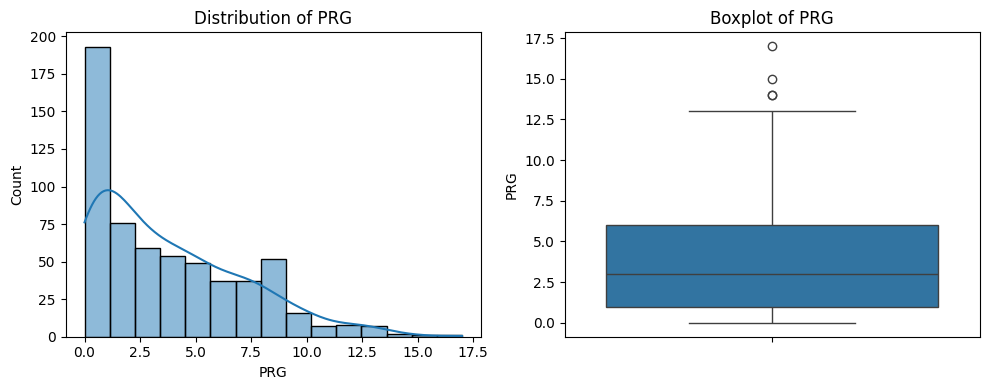

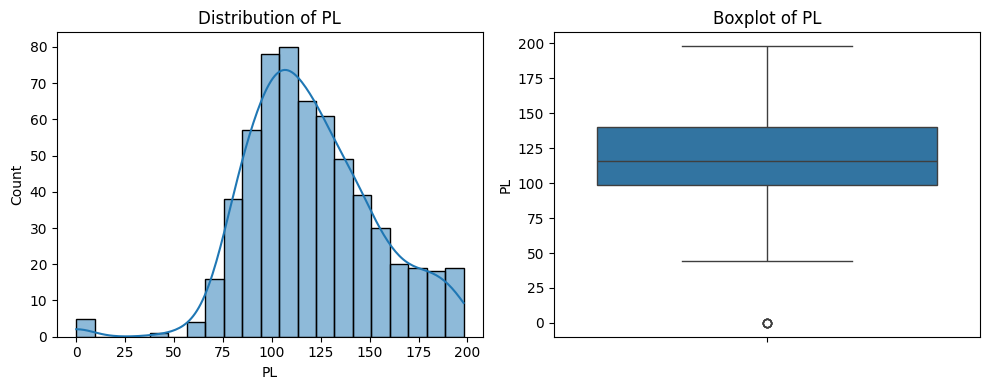

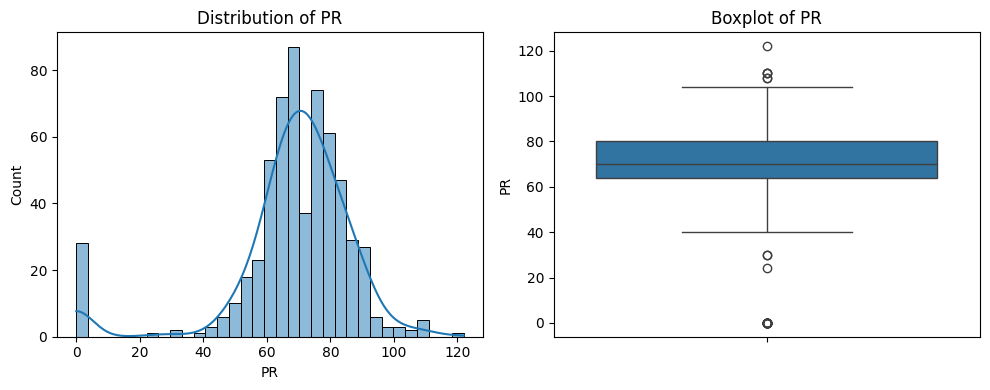

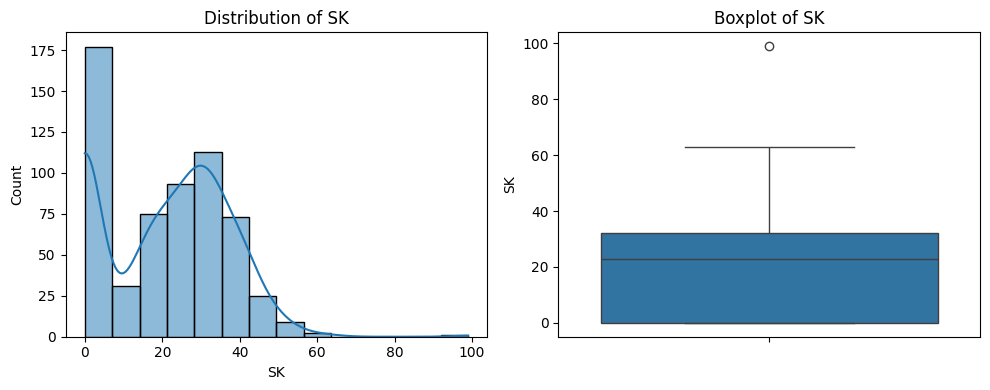

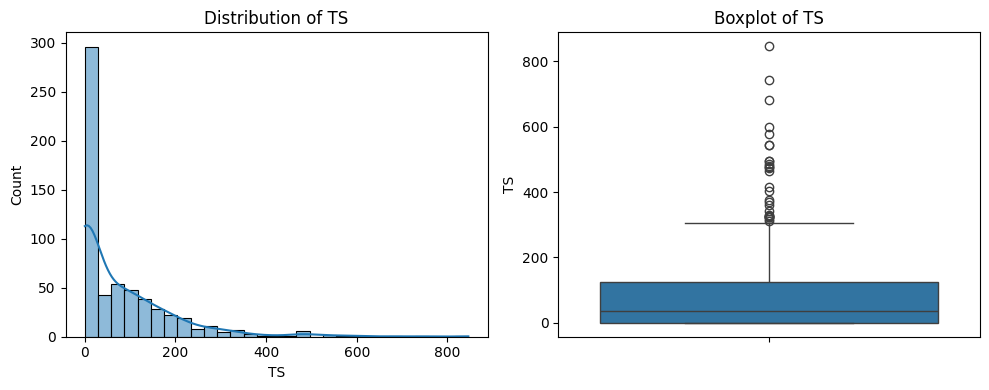

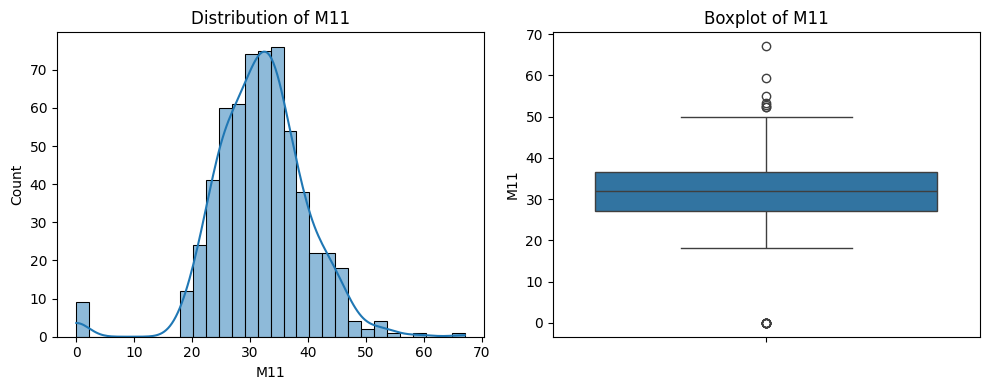

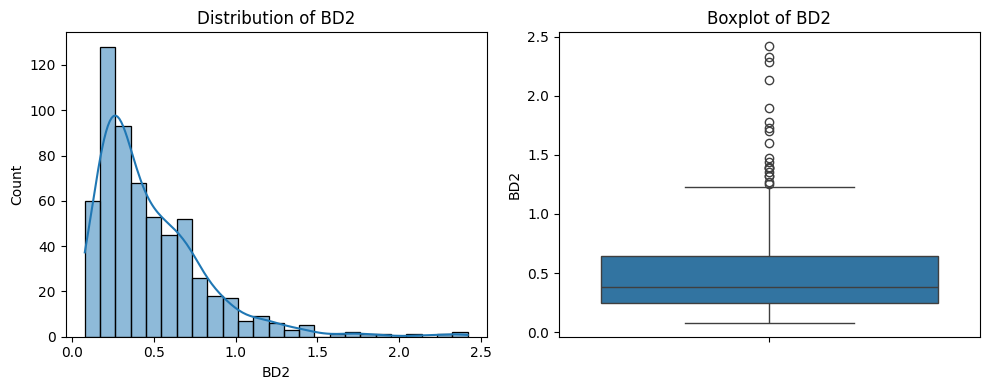

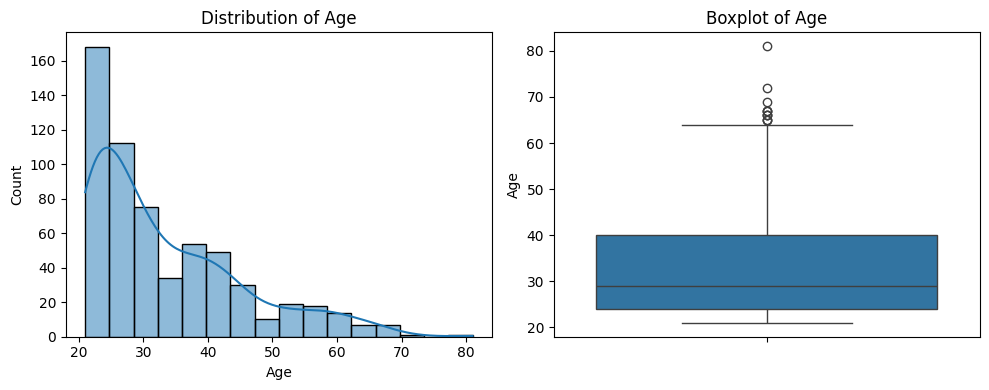

In [ ]:

columns = data.select_dtypes(include=['number']).columns

for column in columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram to check distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    # Boxplot to identify outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()


#### Key Insights:




II. BIVARIATE ANALYSIS

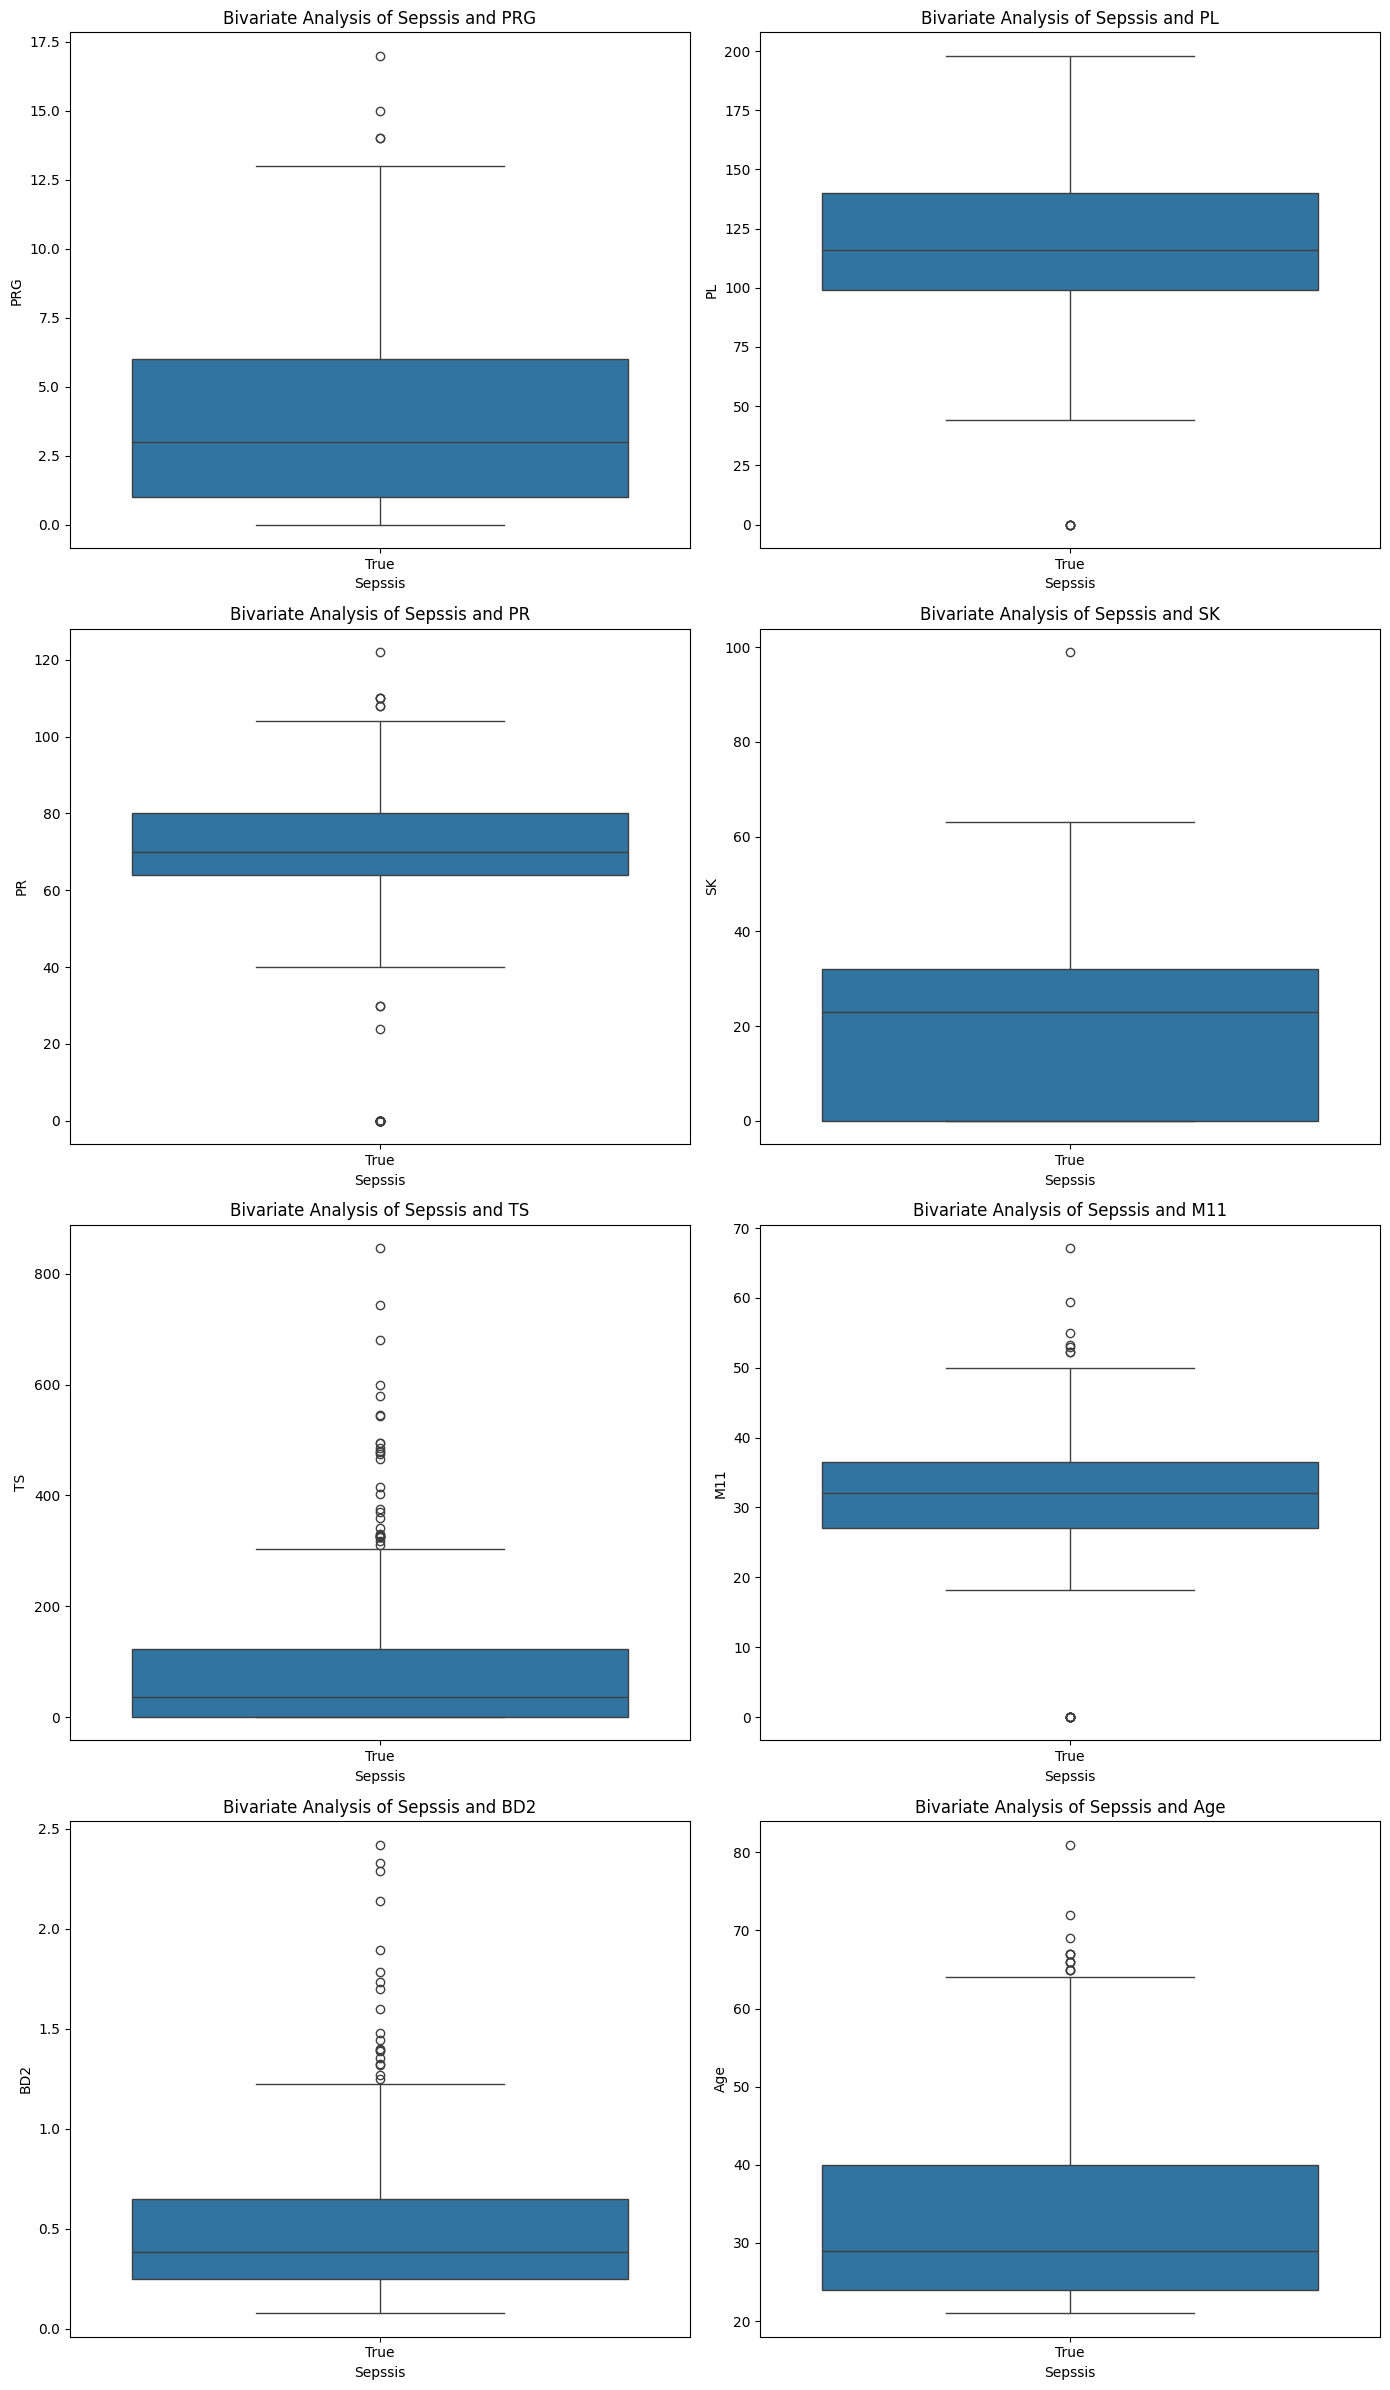

In [ ]:
# Boxplot to check distribution of features against Sepsis (target column)
# Columns of features to analyze
columns = data.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(columns) // 2 + len(columns) % 2, ncols=2, figsize=(14, len(columns) * 3))
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, column in enumerate(columns):
    sns.boxplot(x='Sepssis', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of Sepssis and {column}')

# Hide any extra axes if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


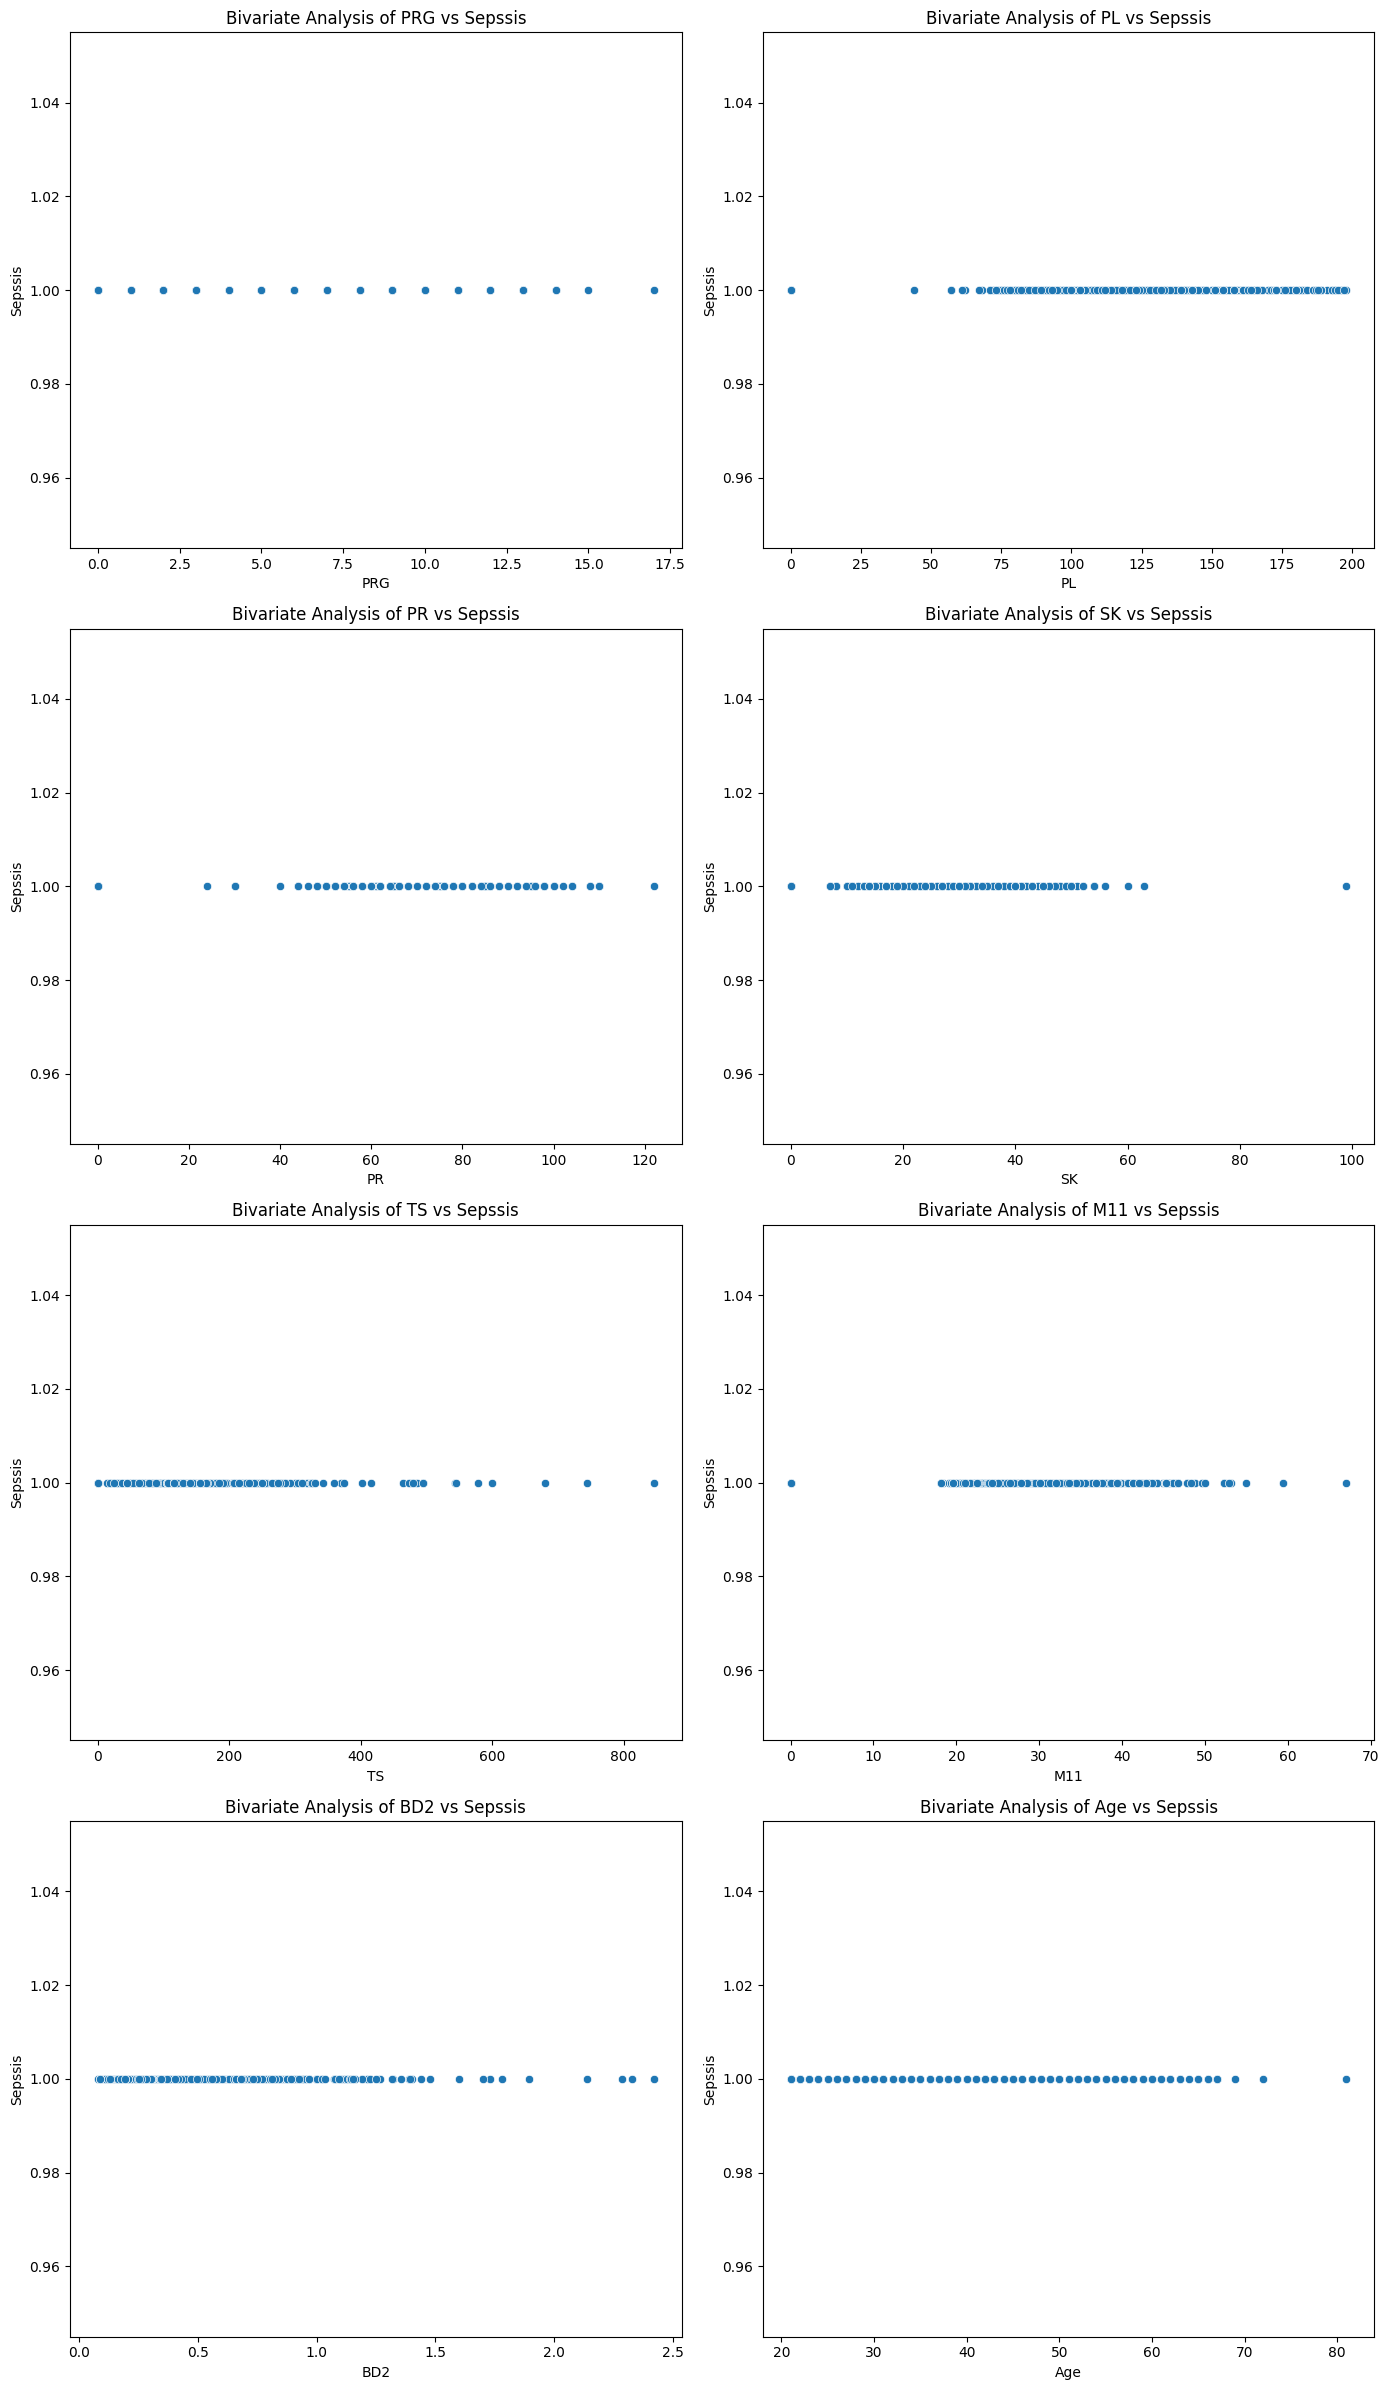

In [27]:
# Create subplots for scatterplots
fig, axes = plt.subplots(nrows=len(columns) // 2 + len(columns) % 2, ncols=2, figsize=(14, len(columns) * 3))
axes = axes.flatten()

# Scatterplots to analyze relationships between numerical features and the target
for i, column in enumerate(columns):
    sns.scatterplot(x=column, y='Sepssis', data=data, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of {column} vs Sepssis')

# Hide any extra axes if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Key Insights

III. MULTIVARIATE ANALYSIS

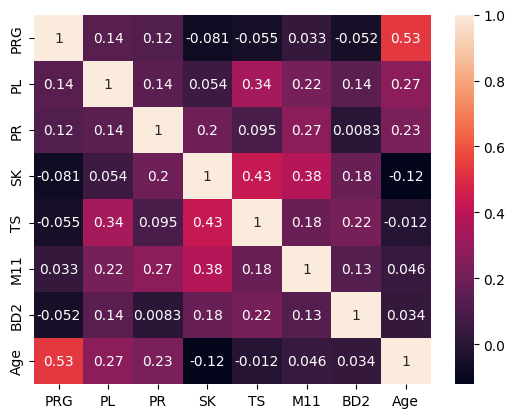

In [18]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


From the correlation heatmap, we can derive these key insights:

i. Age and PRG Correlation: There is a moderately strong positive correlation (0.53) between Age and PRG, indicating that higher age might be associated with higher PRG values.

ii. PL and TS: The PL has a notable correlation (0.34) with TS, which suggests these features might be related in terms of patient outcomes or measurements.

iii. Weak Correlations: Most other features show weak correlations, implying less linear relationship, which might suggest their independent influence on the target variable.

# DATA PREPROCESSING

In [47]:
#feature encoding
data = pd.get_dummies(data, drop_first=True)

#splitting the data
X = data.drop('Sepssis', axis=1)  # Replace 'target_column' with actual target
y = data['Sepssis']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


#Feature Scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)




# BUILDING THE MODEL

Random Forest Classifier
Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

        True       1.00      1.00      1.00       180

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


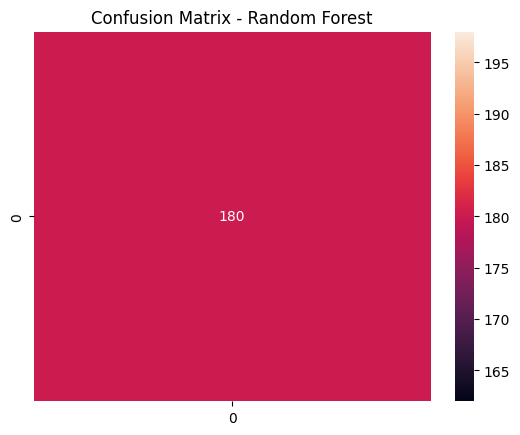

In [48]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_val)

# Evaluation Metrics
print("Random Forest Classifier")
print("Accuracy Score:", accuracy_score(y_val, rf_pred))
print("Classification Report:\n", classification_report(y_val, rf_pred))
sns.heatmap(confusion_matrix(y_val, rf_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()
